In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import scipy as sp
import scipy.optimize as op
from scipy.interpolate import UnivariateSpline
import copy

# Adding library directory to python search path|
import sys
import git
repo = git.Repo('.', search_parent_directories=True)
library_dir = repo.working_tree_dir + '/lib'
sys.path.insert(0, library_dir)

import miptlib as mipt

In [2]:
class setup:
    div2V = 1500 / 100 # В/дел., 1кВ на 100 делений
    L = 0.75 # м, Расстояние от центра кристалла до экрана
    wavelen = 0.63e-6 # м, длина волны
    n0 = 2.29 # м, длина волны
    l = 26e-3 # мм, длина кристалла

In [3]:
data = mipt.read_excel('data/data.xlsx', usecols=['A', 'B', 'C']).dropna(how='all')
data

,m,r1,r2
0,0,0.0,0.0
1,1,2.5,2.7
2,2,3.8,3.9
3,3,4.6,4.7
4,4,5.4,5.5
5,5,6.1,6.1
6,6,6.7,6.6
7,7,7.1,7.2
8,8,7.6,7.6
9,9,8.1,8.0


n - n_0 = 0.098 \pm 0.004


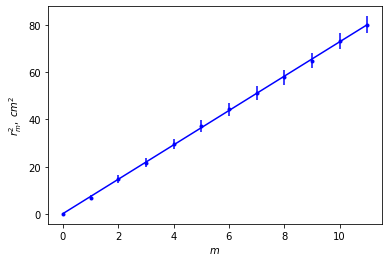

In [10]:
def interp_linear(x, y):
    coeffs = np.polyfit(x, y, 1)
    return lambda x: coeffs[0] * x + coeffs[1]


clean = (data['r1'] + data['r2']) / 2 # в см !!!
r = clean**2

# Погрешность порядка определения центра
line = interp_linear(data['m'], r)
x, y, interp = mipt.plot(data['m'], r, yerr = 2*2 * clean * 0.1, color='blue')

plt.xlabel(r"$m$")
plt.ylabel(r"$r_m^2, \; cm^2$")
plt.savefig('gen/plot.pdf')

mnk_dat = mipt.mnk(x, y)

tangent = mnk_dat.data['a']
tangent_err = 2 * mnk_dat.data['da']

delta_n = (setup.wavelen / setup.l * (setup.n0 * setup.L)**2 / tangent)[0] * 1e4
# Погрешность длины + остальное по мелочи
ddelta_n = delta_n * np.linalg.norm([0.02, 3e-2 / setup.L])


print('n - n_0 = {:.2} \pm {:.1}'.format(delta_n, ddelta_n))